# **STATISTICAL AND MACHINE LEARNING: Group Project**

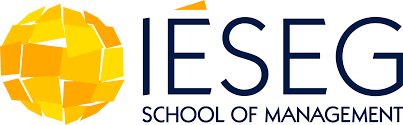

> **Fabrizio Lucero** [LinkedIn](https://www.linkedin.com/in/fabrizio-lucero/)
<br>
> **Yahswanth Thonukunuru** [LinkedIn](https://www.linkedin.com/in/yashwanth-thonukunuru-0b5253166/)
<br>
> **Eleftheria Zygomitrou** [LinkedIn](https://www.linkedin.com/in/eleftheria-zygomitrou/)


## **In - Vehicle Coupon Recommendation**: 

**Scenario 1**

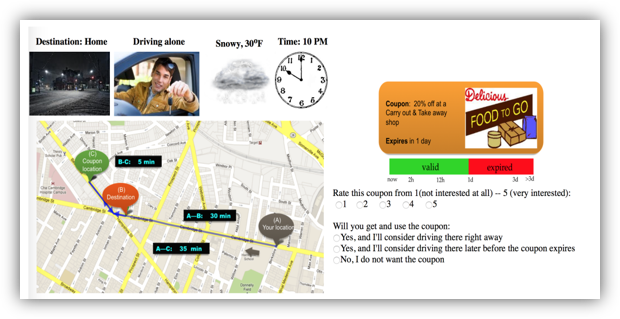

**Scenario 2**

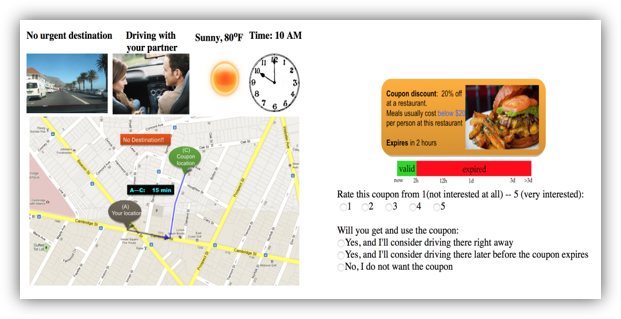

**Business Problem**: Understand user responses to personalized advertisements that are chosen based on user characteristics, the advertisement, and the context. 

Major challenge in the design of recommender systems: **Interaction challenge**

**Data Science Problem:**  Construct rule set models which provide predictions and descriptions of a class, which are reasons for a prediction (feature importance for the important variables inside the model decisions)
<br>
> **Objective:** Create model makes predictions and provides characteristics of the customers and their contexts that lead to an acceptance of coupons. - > **Classification task**


**0. Libraries**

In [9]:
#importing libraries

#preprocessing data
import pandas as pd
import numpy as np
import datetime as dt
import math 
import string
from pandas import DataFrame
from numpy import array
from collections import Counter
from pandas import read_csv

# visualization
from matplotlib import pyplot
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as snsb


# machine learning models
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score,precision_score
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats.stats import pearsonr
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, train_test_split, StratifiedKFold, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.feature_selection import mutual_info_classif

#extra
import sys
import warnings
warnings.filterwarnings('ignore')

**0. Import Data**

In [10]:
# Importing datasets
driving_coupon_train = read_csv("driving_coupon_train.csv")
driving_coupon_test = read_csv("driving_coupon_test.csv")

Data containing 667 entries, some null values across variables and 27 columns including the target `Y` and the unique identifier `client_id`.

In [11]:
driving_coupon_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6667 entries, 0 to 6666
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   client_id             6667 non-null   int64  
 1   destination           6318 non-null   object 
 2   passanger             6341 non-null   object 
 3   weather               6302 non-null   object 
 4   temperature           6333 non-null   float64
 5   time                  6351 non-null   object 
 6   coupon                6367 non-null   object 
 7   expiration            6309 non-null   object 
 8   gender                6317 non-null   object 
 9   age                   6346 non-null   object 
 10  maritalStatus         6379 non-null   object 
 11  has_children          6343 non-null   float64
 12  education             6332 non-null   object 
 13  occupation            6318 non-null   object 
 14  income                6320 non-null   object 
 15  car                  

## 1. Handling Data 

### 1.1. Data Exploration

Data Exploration was done for every variable label in comparison with the target label. You can found this analysis in the attached notebook: **LUCERO_THONUKUNURU_ZYGOMITROU_Data_Exploration.ipynb**

### 1.2. Data Processing

For this section, we created a function that summarizes the process to clean and pre-process all variables. 

> **NULL REPLACEMENT:** 
- **Numerical var:** Inputting the median
- **Categorical var:** 2 methods ( replace by “Not categorized” or mode!)
<br>

> **STANDARDIZATION:** 
- Using MinMaxScaler For numerical variables.
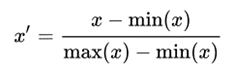

> **ONE-HOT ENCODING**
- Using dummyfication for categorical variables.(Initially will result in a complex model)


In [12]:
def cleaning(train, test,  standarization=True):
    '''
    Function to pass through our train and test datasets, it will automatically clean the train variables, 
    search for null values and input the mode or an na category called : 'Not_Categorized'. For the numerical
    variables it will give an option to standardize the values as well: MinMaxScaler. 
    
    At the end the function will create dummies with the categorical variables for it to be ready to model! 
    
    Parameters: 
    
    train: pd.DataFrame containing the train set. This will be used to calculate descriptive statistics such as the 
    mode, mean, median, etc. 
    
    test: pd.DataFrame containing the test set. This will be used as 'to be transformed' dataset. In this dataframe
    we will make all the cleaning transformation inputting the statistics from the train ( to prevent data leakage.)
    
    standardization: Boolean - default: True. Value to know if the user wants to normalize numerical variables or not.
    '''
    
    #check if target column exists and save it on other df.
    if ('Y' in test.columns) and ('client_id' in test.columns):
        Y=test['Y']
        client_id=test['client_id']
        test=test.drop(['client_id','Y'],axis=1)
    else:
        client_id=test['client_id']
        test=test.drop(['client_id'],axis=1)
        
    #NULLS AND OUTLIERS
    # Identify columns with null values
    null_cols = test.columns[test.isnull().sum() > 0]

    # Iterate through the columns with null values
    for col in null_cols:
    # Check the percentage of null values in the column
        null_percentage = test[col].isnull().mean()
    
        # Check if the column is categorical or numerical
        if test[col].dtype == 'object':
            
           
            # If null percentage is greater than 50%, drop the column
            if null_percentage > 0.5:
                test= test.fillna('Not_categorized')
            else:
            # Replace null values with the mode
                #mode_val = train[col].mode().values[0] #with mode
                test[col]=test[col].fillna('not_categorized')#with na's
            
                
        else:
            # Replace null values with the median
            median_val = train[col].median()
            test[col]=test[col].fillna(median_val)
    cat_cols=[]
    for col in test.columns: 
    

        if test[col].dtype == 'object': 
            cat_cols.append(col)
        
        else:

            if standarization:
                # Create an instance of MinMaxScaler
                scaler = MinMaxScaler()

                # Apply MinMaxScaler to the selected numerical columns
                # Fit the MinMaxScaler on the training data
                scaler.fit(train[[col]])

                # Transform the numerical columns in test data
                test[col] = scaler.transform(test[[col]])

    ##DUMMIES
    test = pd.get_dummies(test, columns=cat_cols, prefix=cat_cols)
    # Drop the original categorical columns after creating dummy variables
    #test=test.drop(cat_cols, axis=1)

    #add target again, if target was inside the df at the beggining:
    if  ('Y' in locals()) and ('client_id' in locals()):
        test['Y']=Y
        test['client_id']=client_id
    
    else:
        test['client_id']=client_id
    
    return test  

**Manually changing some variables to try out**

This section was made just in case it was needed to specifically handle some variables according to their distribution or data type separately. That was not the case for our results. 

In [5]:
#driving_coupon_train['temperature']=driving_coupon_train['temperature'].astype(str)
#driving_coupon_train['temperature']=np.where((driving_coupon_train['temperature']=='30') 
                                             #| (driving_coupon_train['temperature'].isna()), 
                                            # 0,1)

## 2. Modelling

### 2.1. Preparing for Modelling

In [13]:
#We pass our datasets through our function to be ready for modelling. 
train=cleaning(driving_coupon_train, driving_coupon_train, standarization=False)
test=cleaning(driving_coupon_train, driving_coupon_test, standarization=False)

### **2.2. Training and testing x, y split**

In [7]:
X=train.drop('Y',axis=1)
Y=train['Y']

#scikit-learn train-val split
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3, random_state=45)

### **2.3. Running 7 different Models**

Why these models? 
> **Decision Tree** [Documentation](https://scikit-learn.org/stable/modules/tree.html) Decision trees are inherently interpretable. They are graphical structures that can be easily visualized and understood by humans, making them ideal for explaining the decision-making process to non-technical stakeholders
<br>

> **Logistic Regression** [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)  Logistic regression is computationally efficient and can be trained and used for prediction quickly, even on large datasets. It is suitable for real-time or near-real-time applications where low latency is important.
<br>

>**Random Forest** [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) Random Forest can significantly improve the predictive performance compared to individual decision trees.
<br>

>**Boosted Tree**: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) GBT Classifier is known for its high predictive accuracy, often outperforming other classification methods.
<br>

>**Support Vector Machine**: [Documentation](https://scikit-learn.org/stable/modules/svm.html) SVM is capable of handling non-linearly separable data by using kernel functions, which can transform the input features into a higher-dimensional space.
<br>

>**Neural Networks**: [Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) MLP Classifier is capable of learning complex non-linear patterns and relationships in the data, making it suitable for tasks where the decision boundary is not a simple linear function
<br>

>**Catboost Classifier**: [Documentation](https://catboost.ai/en/docs/concepts/python-reference_catboostclassifier)  a gradient boosting framework that is specifically designed for handling categorical features in machine learning tasks, making it particularly suitable for classification tasks where categorical features are prominent

In [16]:
## Try several models
catboost = CatBoostClassifier()
tree         = DecisionTreeClassifier()
logistic     = LogisticRegression(max_iter=500)
randomForest = RandomForestClassifier()
boostedTree  = GradientBoostingClassifier()
svm          = SVC( probability = True)
neuralNet    = MLPClassifier()


models = {"catboost"     :catboost,
          "tree"         :tree,
          "logistic"     :logistic,
          "randomForest" :randomForest,
          "boostedTree"  :boostedTree,
          "svm"          :svm,
          "neuralNet"    :neuralNet  
         }
#Debug print to show which model is being trained.
for model in models:
    models[model].fit(X_train, y_train)
    print(f"{model} has been trained successfully")

Learning rate set to 0.019887
0:	learn: 0.6897240	total: 150ms	remaining: 2m 30s
1:	learn: 0.6862349	total: 159ms	remaining: 1m 19s
2:	learn: 0.6832057	total: 164ms	remaining: 54.6s
3:	learn: 0.6806688	total: 170ms	remaining: 42.2s
4:	learn: 0.6785191	total: 175ms	remaining: 34.7s
5:	learn: 0.6756144	total: 180ms	remaining: 29.8s
6:	learn: 0.6729010	total: 185ms	remaining: 26.3s
7:	learn: 0.6702611	total: 191ms	remaining: 23.7s
8:	learn: 0.6678543	total: 204ms	remaining: 22.5s
9:	learn: 0.6651570	total: 210ms	remaining: 20.8s
10:	learn: 0.6631074	total: 214ms	remaining: 19.3s
11:	learn: 0.6607422	total: 219ms	remaining: 18s
12:	learn: 0.6589902	total: 223ms	remaining: 16.9s
13:	learn: 0.6564978	total: 227ms	remaining: 16s
14:	learn: 0.6543060	total: 231ms	remaining: 15.2s
15:	learn: 0.6524448	total: 235ms	remaining: 14.5s
16:	learn: 0.6504498	total: 240ms	remaining: 13.9s
17:	learn: 0.6487747	total: 244ms	remaining: 13.3s
18:	learn: 0.6470652	total: 248ms	remaining: 12.8s
19:	learn: 0.

189:	learn: 0.5387613	total: 889ms	remaining: 3.79s
190:	learn: 0.5382959	total: 893ms	remaining: 3.78s
191:	learn: 0.5379882	total: 897ms	remaining: 3.77s
192:	learn: 0.5378388	total: 902ms	remaining: 3.77s
193:	learn: 0.5373393	total: 906ms	remaining: 3.76s
194:	learn: 0.5371032	total: 910ms	remaining: 3.76s
195:	learn: 0.5366677	total: 916ms	remaining: 3.76s
196:	learn: 0.5364221	total: 921ms	remaining: 3.75s
197:	learn: 0.5360403	total: 925ms	remaining: 3.75s
198:	learn: 0.5354252	total: 931ms	remaining: 3.75s
199:	learn: 0.5349129	total: 935ms	remaining: 3.74s
200:	learn: 0.5344815	total: 939ms	remaining: 3.73s
201:	learn: 0.5342115	total: 943ms	remaining: 3.72s
202:	learn: 0.5339548	total: 947ms	remaining: 3.72s
203:	learn: 0.5337127	total: 951ms	remaining: 3.71s
204:	learn: 0.5334271	total: 955ms	remaining: 3.71s
205:	learn: 0.5330333	total: 959ms	remaining: 3.7s
206:	learn: 0.5326750	total: 963ms	remaining: 3.69s
207:	learn: 0.5323440	total: 967ms	remaining: 3.68s
208:	learn: 0

350:	learn: 0.4922108	total: 1.6s	remaining: 2.95s
351:	learn: 0.4918505	total: 1.6s	remaining: 2.95s
352:	learn: 0.4913674	total: 1.61s	remaining: 2.94s
353:	learn: 0.4910988	total: 1.61s	remaining: 2.94s
354:	learn: 0.4909204	total: 1.62s	remaining: 2.94s
355:	learn: 0.4905664	total: 1.62s	remaining: 2.94s
356:	learn: 0.4901408	total: 1.63s	remaining: 2.93s
357:	learn: 0.4897389	total: 1.63s	remaining: 2.93s
358:	learn: 0.4893991	total: 1.64s	remaining: 2.92s
359:	learn: 0.4890626	total: 1.64s	remaining: 2.92s
360:	learn: 0.4888378	total: 1.65s	remaining: 2.92s
361:	learn: 0.4885802	total: 1.65s	remaining: 2.91s
362:	learn: 0.4883149	total: 1.66s	remaining: 2.91s
363:	learn: 0.4880895	total: 1.66s	remaining: 2.9s
364:	learn: 0.4877268	total: 1.67s	remaining: 2.9s
365:	learn: 0.4873405	total: 1.67s	remaining: 2.9s
366:	learn: 0.4870661	total: 1.68s	remaining: 2.89s
367:	learn: 0.4868335	total: 1.68s	remaining: 2.89s
368:	learn: 0.4866624	total: 1.69s	remaining: 2.89s
369:	learn: 0.486

525:	learn: 0.4464821	total: 2.48s	remaining: 2.23s
526:	learn: 0.4461970	total: 2.48s	remaining: 2.23s
527:	learn: 0.4458347	total: 2.49s	remaining: 2.22s
528:	learn: 0.4455572	total: 2.49s	remaining: 2.22s
529:	learn: 0.4452778	total: 2.5s	remaining: 2.21s
530:	learn: 0.4450156	total: 2.5s	remaining: 2.21s
531:	learn: 0.4447208	total: 2.51s	remaining: 2.21s
532:	learn: 0.4444422	total: 2.51s	remaining: 2.2s
533:	learn: 0.4441527	total: 2.52s	remaining: 2.2s
534:	learn: 0.4439102	total: 2.52s	remaining: 2.19s
535:	learn: 0.4436671	total: 2.53s	remaining: 2.19s
536:	learn: 0.4434808	total: 2.53s	remaining: 2.18s
537:	learn: 0.4431846	total: 2.54s	remaining: 2.18s
538:	learn: 0.4429331	total: 2.54s	remaining: 2.17s
539:	learn: 0.4426865	total: 2.54s	remaining: 2.17s
540:	learn: 0.4425015	total: 2.55s	remaining: 2.16s
541:	learn: 0.4422805	total: 2.55s	remaining: 2.15s
542:	learn: 0.4420820	total: 2.55s	remaining: 2.15s
543:	learn: 0.4417908	total: 2.56s	remaining: 2.14s
544:	learn: 0.44

691:	learn: 0.4074268	total: 3.19s	remaining: 1.42s
692:	learn: 0.4071897	total: 3.19s	remaining: 1.41s
693:	learn: 0.4069493	total: 3.19s	remaining: 1.41s
694:	learn: 0.4067671	total: 3.2s	remaining: 1.4s
695:	learn: 0.4065270	total: 3.2s	remaining: 1.4s
696:	learn: 0.4062799	total: 3.2s	remaining: 1.39s
697:	learn: 0.4060250	total: 3.21s	remaining: 1.39s
698:	learn: 0.4057390	total: 3.21s	remaining: 1.38s
699:	learn: 0.4054839	total: 3.21s	remaining: 1.38s
700:	learn: 0.4052228	total: 3.22s	remaining: 1.37s
701:	learn: 0.4050286	total: 3.22s	remaining: 1.37s
702:	learn: 0.4048629	total: 3.23s	remaining: 1.36s
703:	learn: 0.4046816	total: 3.23s	remaining: 1.36s
704:	learn: 0.4044876	total: 3.23s	remaining: 1.35s
705:	learn: 0.4043132	total: 3.23s	remaining: 1.35s
706:	learn: 0.4040501	total: 3.24s	remaining: 1.34s
707:	learn: 0.4038644	total: 3.24s	remaining: 1.34s
708:	learn: 0.4036466	total: 3.25s	remaining: 1.33s
709:	learn: 0.4035069	total: 3.25s	remaining: 1.33s
710:	learn: 0.403

887:	learn: 0.3699355	total: 3.9s	remaining: 492ms
888:	learn: 0.3697804	total: 3.9s	remaining: 487ms
889:	learn: 0.3696318	total: 3.91s	remaining: 483ms
890:	learn: 0.3693897	total: 3.91s	remaining: 478ms
891:	learn: 0.3693063	total: 3.92s	remaining: 474ms
892:	learn: 0.3691217	total: 3.92s	remaining: 470ms
893:	learn: 0.3688555	total: 3.92s	remaining: 465ms
894:	learn: 0.3686518	total: 3.93s	remaining: 461ms
895:	learn: 0.3684889	total: 3.93s	remaining: 456ms
896:	learn: 0.3683600	total: 3.94s	remaining: 452ms
897:	learn: 0.3682004	total: 3.94s	remaining: 448ms
898:	learn: 0.3679708	total: 3.94s	remaining: 443ms
899:	learn: 0.3677704	total: 3.95s	remaining: 439ms
900:	learn: 0.3675400	total: 3.95s	remaining: 434ms
901:	learn: 0.3673756	total: 3.96s	remaining: 430ms
902:	learn: 0.3672037	total: 3.96s	remaining: 425ms
903:	learn: 0.3669940	total: 3.96s	remaining: 421ms
904:	learn: 0.3667784	total: 3.97s	remaining: 416ms
905:	learn: 0.3665775	total: 3.97s	remaining: 412ms
906:	learn: 0.

### **2.4. Model Scoring**

Models being evaluated both in `accuracy_score` and in `roc_auc_score`

In [17]:
performances = {}

for model in models:
    predictions_train   = models[model].predict(X_train)
    predictions_test   = models[model].predict(X_val)
    probabilities_train = pd.DataFrame(models[model].predict_proba(X_train))[1]
    probabilities_test = pd.DataFrame(models[model].predict_proba(X_val))[1]
    accuracy_train = accuracy_score(y_train,predictions_train)
    accuracy_test  = accuracy_score(y_val,predictions_test)
    auc_train = roc_auc_score(np.array(y_train),np.array(probabilities_train))
    auc_test  = roc_auc_score(np.array(y_val),np.array(probabilities_test))
    
    performances[model] = {"Accuracy Train":accuracy_train,"Accuracy Test":accuracy_test, 
                          "AUC Train":auc_train, "AUC_Test":auc_test}

pd.DataFrame(performances)

,catboost,tree,logistic,randomForest,boostedTree,svm,neuralNet
Accuracy Train,0.903129,1.000000,0.685169,1.000000,0.749250,0.565366,0.476425
Accuracy Test,0.720640,0.608696,0.681159,0.714143,0.700150,0.560720,0.475262
AUC Train,0.968281,1.000000,0.741132,1.000000,0.831921,0.533997,0.592954
AUC_Test,0.789137,0.603147,0.724968,0.777115,0.756875,0.505816,0.595124


Two models are presenting the higher AUC Score in the validation set. Both **Random Forest** and **Boosted Tree**. Since Boosted tree has less potential to overfit in this case, we will proceed with the GBTClassifier()! 

<br>
(P.D: Catboost was added in a later version but results converge to a lower value in the test set - Kaggle competition)

### 2.5. **Cross-validation** (optional to run - Computationally complex)

In [11]:
?GradientBoostingClassifier

Cross validation was applied to try to hyperparametize the GBTClassifier. Despite our efforts, the procedure took too long to essay and continue with a proper experimental setup that's why we tried a different approach...

In [ ]:
#parameter options 
loss = ['deviance', 'exponential']
max_depth = [2,4, 6, 8, 10, 12]
min_samples_leaf=[1, 2, 4, 8, 12, 16]
max_features=['auto', 'sqrt', 'log2']
max_leaf_nodes= [None, 2, 4, 6]

#Grid Search: https://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html
#define grid search
grid = dict(criterion=criterion,max_depth=max_depth, min_samples_leaf= min_samples_leaf,
            max_features=max_features, max_leaf_nodes=max_leaf_nodes )
cv = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=123)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='roc_auc',error_score=0)
dt_grid = grid_search.fit(X_train, y_train)

#best model
model= dt_grid.best_estimator_
print('Model chosen:',model)

### 2.6. Analyzing each parameter performance

In [482]:
?GradientBoostingClassifier

#### 2.6.1. Random state

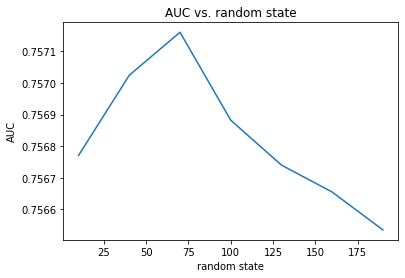

In [558]:
croimport matplotlib.pyplot as plt
import numpy as np

# Define a range of values for random state
rstate_range = np.arange(10, 200, 30)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of random states
for rstate in rstate_range:
    # Create a GradientBoostingClassifier with the random state modifiable
    model = GradientBoostingClassifier(random_state=rstate)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus random state
plt.plot(rstate_range, auc_scores)
plt.xlabel('random state')
plt.ylabel('AUC')cro
plt.title('AUC vs. random state')
plt.show()

We can clearly see how the seed can also affect the results. In this case, because of randomness, the validation set performs a lot better with a random state = `70`. 

#### 2.6.2. Subsample

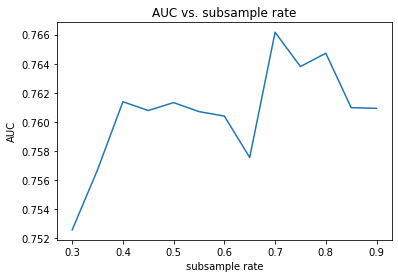

In [566]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for subsample rates.
subsample_range = np.arange(0.3, 0.95, 0.05)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of subsample rates
for subs in subsample_range:
    # Create a GradientBoostingClassifier with the subsample being iterable
    model = GradientBoostingClassifier(subsample=subs, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus subsample rates.
plt.plot(subsample_range, auc_scores)
plt.xlabel('subsample rate')
plt.ylabel('AUC')
plt.title('AUC vs. subsample rate')
plt.show()

under this configuration, the subsample rate of `0.7` is the one performing best. 

#### 2.6.3. Max depth

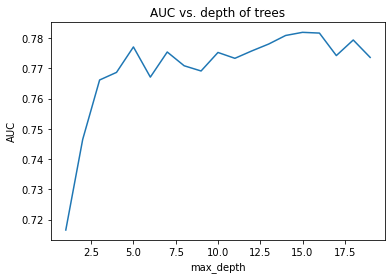

In [568]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for max depth of trees
depth_range = np.arange(1, 20, 1)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of trees depth
for depth in depth_range:
    # Create a GradientBoostingClassifier with the iterable number of trees depth
    model = GradientBoostingClassifier(subsample=0.7,
                                      max_depth=depth, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus depth of trees
plt.plot(depth_range, auc_scores)
plt.xlabel('max_depth')
plt.ylabel('AUC')
plt.title('AUC vs. depth of trees')
plt.show()

The max depth of the tree has the same performance being `15` or `16` in this case. 

#### 2.6.4. N_estimators

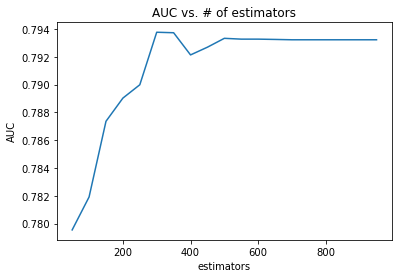

In [570]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for number of estimators
estimators_range = np.arange(50, 1000, 50)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of number of estimators
for est in estimators_range:
    # Create a GradientBoostingClassifier with the current number of estimators
    model = GradientBoostingClassifier(subsample=0.7,
                                      max_depth=15, 
                                      n_estimators=est, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus number of estimators
plt.plot(estimators_range, auc_scores)
plt.xlabel('estimators')
plt.ylabel('AUC')
plt.title('AUC vs. # of estimators')
plt.show()

Peak found at around `300` estimators. 

#### 2.6.5. min samples split

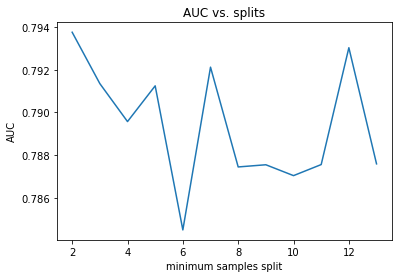

In [571]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for splits
split_range = np.arange(2, 14, 1)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of number of splits
for split in split_range:
    # Create a GradientBoostingClassifier with the current number of splits
    model = GradientBoostingClassifier(subsample=0.7,
                                      max_depth=15, 
                                      n_estimators=300, 
                                      min_samples_split=split, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus number of splits
plt.plot(split_range, auc_scores)
plt.xlabel('minimum samples split')
plt.ylabel('AUC')
plt.title('AUC vs. splits')
plt.show()

We can proceed with `2` minimum samples per split.

#### 2.6.6. Loss

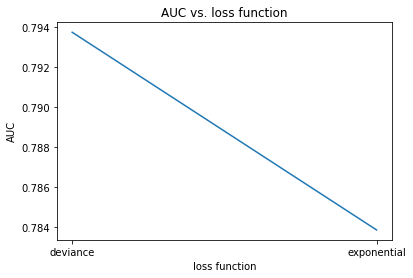

In [573]:
import matplotlib.pyplot as plt
import numpy as np

# Define the loss list.
loss_func = ['deviance', 'exponential']

# Create empty lists to store AUC values
auc_scores = []

# Loop through the loss functions
for lossf in loss_func:
    # Create a GradientBoostingClassifier with the previous random state and the loss function options
    model = GradientBoostingClassifier(loss=lossf,
                                       subsample=0.7,
                                      max_depth=15, 
                                      n_estimators=300, 
                                      min_samples_split=2, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus loss functions
plt.plot(loss_func, auc_scores)
plt.xlabel('loss function')
plt.ylabel('AUC')
plt.title('AUC vs. loss function')
plt.show()

`deviance` function performs better than the `exponential` function in this case. 

#### 2.6.7. max features.

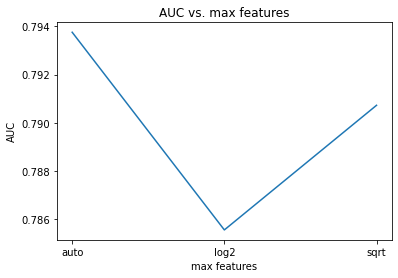

In [574]:
import matplotlib.pyplot as plt
import numpy as np

# Define features list
features_list = ['auto', 'log2', 'sqrt']

# Create empty lists to store AUC values
auc_scores = []

# Loop through the features
for ft in features_list:
    # Create a GradientBoostingClassifier with the current feature type
    model = GradientBoostingClassifier(max_features=ft,
                                      loss='deviance',
                                      subsample=0.7,
                                      max_depth=15, 
                                      n_estimators=300, 
                                      min_samples_split=2, 
                                      random_state=70)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus max features
plt.plot(features_list, auc_scores)
plt.xlabel('max features')
plt.ylabel('AUC')
plt.title('AUC vs. max features')
plt.show()

#### 2.6.8. Trying out different combinations (orders)

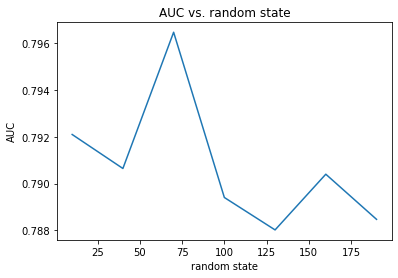

In [484]:
import matplotlib.pyplot as plt
import numpy as np

# Define a range of values for number of estimators
rstate_range = np.arange(10, 200, 30)

# Create empty lists to store AUC values
auc_scores = []

# Loop through the range of number of estimators
for rstate in rstate_range:
    # Create a GradientBoostingClassifier with the current number of estimators
    model = GradientBoostingClassifier(loss='exponential', subsample=0.8,
                                      max_depth=15, max_features='auto', n_estimators=500, min_samples_split=4, 
                                      random_state=rstate)
    model.fit(X_train, y_train)
    probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]
    auc = roc_auc_score(np.array(y_val), np.array(probabilities_test))
    auc_scores.append(auc)

# Plot the AUC versus number of estimators
plt.plot(rstate_range, auc_scores)
plt.xlabel('random state')
plt.ylabel('AUC')
plt.title('AUC vs. random state')
plt.show()

By applying different iterations we managed to find the following combination, that gives so far the best result: 
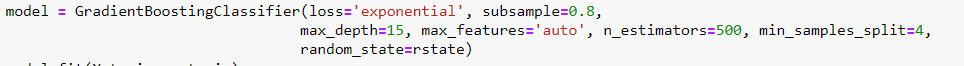

#### 2.7. Results (Partial) - Evaluation Metrics

In [24]:
model  =  GradientBoostingClassifier(loss='exponential',subsample=0.8,
                                     max_depth=15, max_features='auto',
                                     n_estimators=500, min_samples_split=4,
                                     random_state=70)
model.fit(X_train, y_train)
predictions_train   = model.predict(X_val)
probabilities_train = pd.DataFrame(model.predict_proba(X_val))[1]
predictions_test   = model.predict(X_val)
probabilities_test = pd.DataFrame(model.predict_proba(X_val))[1]

accuracy_test  = accuracy_score(y_val,predictions_test)
auc_test  = roc_auc_score(np.array(y_val),np.array(probabilities_test))

print('Acurracy ',accuracy_test, 'AUC ', auc_test)

Acurracy  0.7316341829085458 AUC  0.7964654576278749


Model performs very well, in this case our AUC is very high (Since we are working with probailities and taking into account the sample submission - we will focus on the increasement of ROC_AUC_Score) but we have to take into account that this model has along 142 variables. We need to assess the possibility of reducing model compexity even if the AUC Score diminishes. (For replicability)

## 3. Experimental Set-up ( Variable selection) 

### 3.1. Mutual info Classifier

returns an estimate of the information gain or reduction in uncertainty that a feature provides about the target variable.

In [496]:
mutual_info = mutual_info_classif(train.drop('Y',axis=1), train['Y'].values.squeeze())
mutual_info = pd.Series(mutual_info, index=train.drop('Y',axis=1).columns)
print("Top 15 vars :"); print(mutual_info.sort_values(ascending=False)[:15])

Top 15 vars :
coupon_Bar                               0.015851
CoffeeHouse_never                        0.014147
expiration_1d                            0.011935
destination_No Urgent Place              0.011379
Bar_gt8                                  0.010843
toCoupon_GEQ15min_0.0                    0.009769
CarryAway_gt8                            0.009188
CoffeeHouse_gt8                          0.008746
Restaurant20To50_never                   0.008585
maritalStatus_Widowed                    0.008533
coupon_Carry out & Take away             0.008524
CoffeeHouse_less1                        0.008420
occupation_Architecture & Engineering    0.008128
coupon_Restaurant(<20)                   0.007773
time_not_categorized                     0.007557
dtype: float64


### 3.2. Feature Importance

Extracting the most important features from our model created and tuned. Trying to match important variables at the end from both methods. 

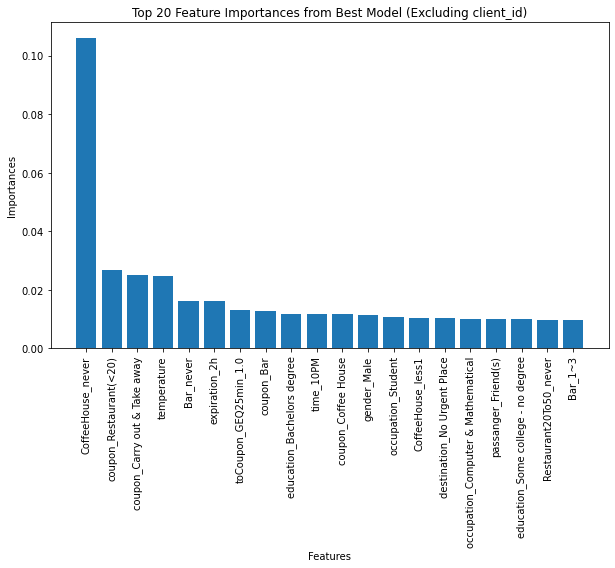

----------------TOP 10 MOST IMPORTANT VARIABLES-------------------
client_id: 0.1060
CoffeeHouse_never: 0.0268
coupon_Restaurant(<20): 0.0252
coupon_Carry out & Take away: 0.0248
temperature: 0.0163
Bar_never: 0.0162
expiration_2h: 0.0130
toCoupon_GEQ25min_1.0: 0.0126
coupon_Bar: 0.0119
education_Bachelors degree: 0.0117


In [25]:
importances = model.feature_importances_
#if it doesn't work try
#importances= model.coefficients_[0]

# Get the names of the features from the X_train_scaled_df dataframe
feature_names = X_train.columns

# Sort the features and their importances in descending order
sorted_indices = importances.argsort()[::-1]
sorted_importances = importances[sorted_indices]
sorted_features = feature_names[sorted_indices]


# Filter out the `client_id` from the top features
top_20_features = [feat for feat in sorted_features if feat != 'client_id'][:20]
top_20_importances = sorted_importances[:20]

# Create a bar graph of the top 20 feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(top_20_importances)), top_20_importances)
plt.xticks(range(len(top_20_importances)), top_20_features, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importances')
plt.title('Top 20 Feature Importances from Best Model (Excluding client_id)')
plt.show()

print("----------------TOP 10 MOST IMPORTANT VARIABLES-------------------")
# Save the top 10 features and their importances in a list
top_10_features = []
top_10_importances = []
for i in range(10):
    top_10_features.append(sorted_features[i])
    top_10_importances.append(sorted_importances[i])
    print(f"{sorted_features[i]}: {sorted_importances[i]:.4f}")


**Selected columns:** `'coupon_Bar', 'CoffeeHouse_never', 'expiration_1d', 'destination_No Urgent Place', 
               'coupon_Carry out & Take away', 'CoffeeHouse_less1', 'coupon_Restaurant(<20)'`

In [19]:
cols_to_filter=['coupon_Bar', 'CoffeeHouse_never', 'expiration_1d', 'destination_No Urgent Place', 
               'coupon_Carry out & Take away', 'CoffeeHouse_less1', 'coupon_Restaurant(<20)']

## 4. Results

### 4.1. Debugging

Functions to plot the learning curves and model scability and performance. 

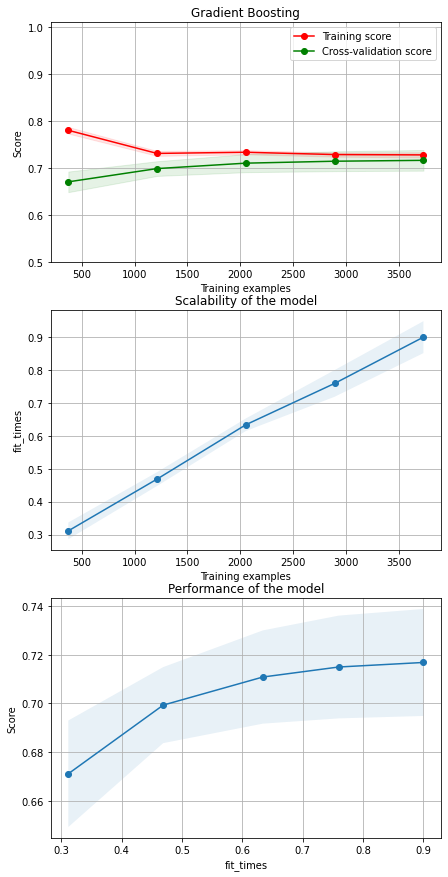

In [542]:
from sklearn.model_selection import learning_curve
#SOURCE: Minh Phan Kaggle Competition Example submitted through IESEG ONLINE!
def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None, scoring=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

# Plot the learning curve
cv = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
title = "Gradient Boosting"
fig, axes = plt.subplots(3, 1, figsize=(7, 15))
plot_learning_curve(GradientBoostingClassifier(loss='deviance', subsample=subs,
                                      max_depth=3, max_features='auto', 
                                      n_estimators=500, min_samples_split=4, 
                                      random_state=40), title, X_train[cols_to_filter], y_train, axes=axes, ylim=(0.5, 1.01),
                    cv=cv, n_jobs=4, scoring='roc_auc')
plt.show()

- After various training examples, you can see both training and test converging under 72%, no overfitting is occurring.
- We identified the training time increases significantly with larger datasets, which may impact the model's practical applicability in real-world scenarios.( need to reduce variables - DONE) 



Added # top vars : 100


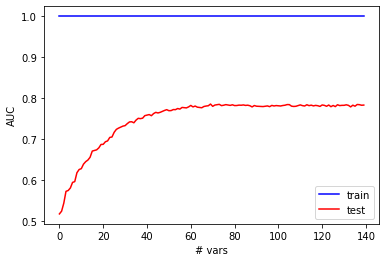

CPU times: total: 4.39 s
Wall time: 1h 11min


In [28]:
%%time
from sklearn.model_selection import cross_validate
model  =  GradientBoostingClassifier(loss='exponential',subsample=0.8,
                                     max_depth=15, max_features='auto',
                                     n_estimators=500, min_samples_split=4,
                                     random_state=70)
model.fit(X_train[cols_to_filter], y_train)


# Check how AUC change when add more variables: Top n vars
fs_scores = []
top_n_vars = 140
for i in range(1, top_n_vars+1):
    if i % 100 == 0: print('Added # top vars :', i)
    top_n_predictors = sorted_features[:i]
    clf = model
    fs_scores.append(cross_validate(clf, X_train[top_n_predictors], y_train.values.squeeze(),
                                    scoring='roc_auc', cv=5, verbose=0, n_jobs=-1, return_train_score=True))

# How the AUC curve looks like when adding top vars
plt.plot([s['train_score'].mean() for s in fs_scores], color='blue')
plt.plot([s['test_score'].mean() for s in fs_scores], color='red')
plt.xlabel('# vars')
plt.ylabel('AUC')
plt.legend(['train', 'test'])
plt.show()

To end: The code provided is for evaluating the performance of a gradient boosting classifier using cross-validation and plotting the change in Area Under the Curve (AUC) for both train and test sets as more variables (features) are added to the model. **142 VARIABLES WILL OVERFIT ALWAYS, THAT'S WHY WE REDUCED TO 7 VARIABLES.**

**Save results to excel**

In [29]:
train.to_csv('train_basetable.csv', index=False)
test.to_csv('test_basetable.csv', index=False)

In [490]:
model.fit(X, Y)
#predicting probabilities
predictions_test   = model.predict(test)
probabilities_test = pd.DataFrame(model.predict_proba(test))[1]
test['Y']=probabilities_test
#save the csv
test[['client_id','Y']].to_csv('results.csv', index=False)

> **Fabrizio Lucero** [LinkedIn](https://www.linkedin.com/in/fabrizio-lucero/)
<br>
> **Yahswanth Thonukunuru** [LinkedIn](https://www.linkedin.com/in/yashwanth-thonukunuru-0b5253166/)
<br>
> **Eleftheria Zygomitrou** [LinkedIn](https://www.linkedin.com/in/eleftheria-zygomitrou/)

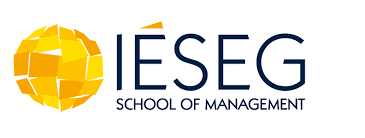